In [1]:
%load_ext autoreload
%autoreload 2

from Bio import SeqIO
import matplotlib.pyplot as plt
from seqme.utils import read_fasta_file
from config_paths import PATHS_FOR_CONTROL, PATHS_FOR_MODELS

In [7]:
PATHS_FOR_CONTROL

{'positives': '../data/filtered/filtered_25_positives.fasta',
 'positives_hq': '../data/filtered/filtered_25_positives_hq.fasta',
 'negatives': '../data/filtered/filtered_25_negatives.fasta',
 'negatives_hq': '../data/filtered/filtered_25_negatives_hq.fasta',
 'random_uniform': '../data/filtered/random_amp_uniform_distribution.fasta',
 'random_standard': '../data/filtered/random_amp_with_standard_distribution.fasta'}

In [8]:
PATHS_FOR_MODELS

{'UniProt': '../data/uniprot/uniprot_8_50_100.fasta',
 'DBAASP': '../data/dbaasp.fasta',
 'AMP-Diffusion': '../data/amp-diffusion.fasta',
 'AMP-GAN': '../data/amp-gan.fasta',
 'CPL-Diff': '../data/cpl-diff.fasta',
 'HydrAMP': '../data/hydramp.fasta',
 'OmegAMP': '../data/omegamp.fasta'}

In [15]:
def plot_sequence_length_histogram(fasta_path, bins=40, figsize=(10, 6)):
    sequence_lengths = [len(record.seq) for record in SeqIO.parse(fasta_path, "fasta")]
    plt.figure(figsize=figsize)
    plt.hist(sequence_lengths, bins=bins, color='skyblue', edgecolor='black')
    plt.title("Histogram of Sequence Lengths")
    plt.xlabel("Sequence Length")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


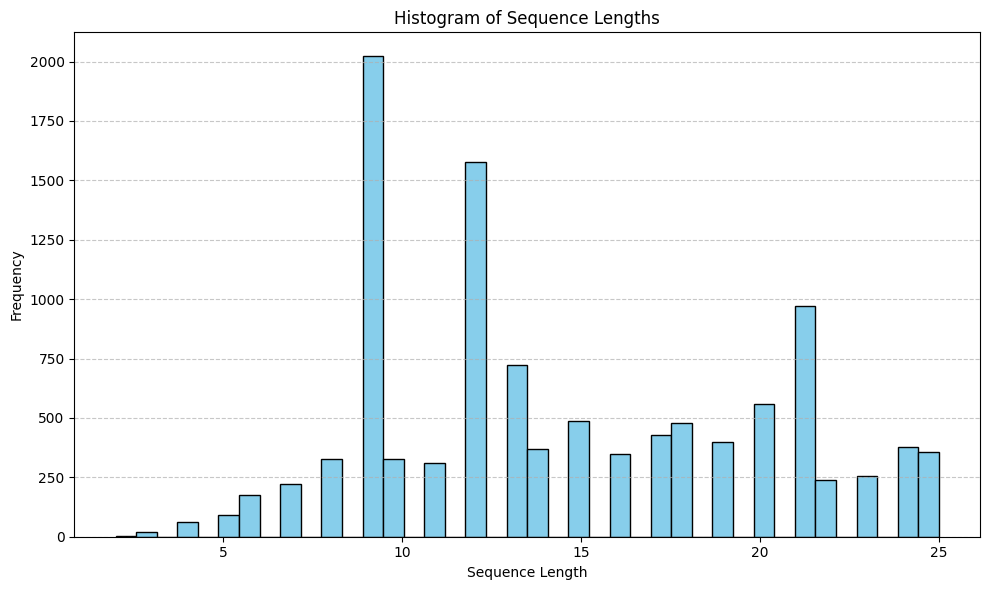

In [16]:
plot_sequence_length_histogram(PATHS_FOR_CONTROL["positives"])

In [ ]:
import pickle

CACHE_PATH = "../esm_t33_650M_UR50D_precomputed.pkl"

if CACHE_PATH:
    with open(CACHE_PATH, "rb") as f:
        init_cache = pickle.load(f)

In [3]:

CACHE_PATH_2 = "../esm_pretrained_precomputed.pkl"  

if CACHE_PATH_2:
    with open(CACHE_PATH_2, "rb") as f:
        init_cache_2 = pickle.load(f)

In [ ]:
init_cache_2["esm2-pretrain"] = init_cache_2.pop("esm2-embed")

init_cache_2.pop("embedder", None)
init_cache_2.pop("gravy", None)
init_cache_2.pop("esm2-perplexity", None)
init_cache_2.pop("charge", None)
init_cache_2.pop("amphiphilicity", None)

{}

In [8]:
init_cache.pop("embedder", None)
init_cache.pop("gravy", None)
init_cache.pop("esm2-perplexity", None)
init_cache.pop("charge", None)
init_cache.pop("amphiphilicity", None)

{}

In [10]:
init_cache.update(init_cache_2)

In [ ]:
path_1 = "../init_cache.pkl"

with open(path_1, "wb") as f:
    pickle.dump(init_cache, f)

In [14]:
init_cache

{'esm2-embed': {'LFIFFF': array([ 0.06041545,  0.1216473 ,  0.11779159, ...,  0.16998215,
         -0.17039429, -0.1339009 ], shape=(1280,), dtype=float32),
  'GIWDTIKSMGKVFAGKILQNL': array([ 0.09444156, -0.06085979, -0.05928415, ..., -0.00776299,
         -0.07449645, -0.04787933], shape=(1280,), dtype=float32),
  'WLNALLHHGLNCAKGVLA': array([-0.030104  ,  0.01124655,  0.00672668, ..., -0.03257341,
         -0.09213008,  0.06249928], shape=(1280,), dtype=float32),
  'KLALKLALKAWKAALKLA': array([-0.04212782, -0.00955891, -0.00102956, ...,  0.12709141,
          0.20684692, -0.14702469], shape=(1280,), dtype=float32),
  'GIGKFIHAAKKFGKLFIGEIMNS': array([ 0.04550779, -0.04142461, -0.0696537 , ...,  0.00562469,
         -0.04199534, -0.00243952], shape=(1280,), dtype=float32),
  'GIGKFIHSVKKWGKTFIGEIMNS': array([ 0.07723495, -0.04572996, -0.05664482, ...,  0.0138845 ,
         -0.05594115, -0.00805373], shape=(1280,), dtype=float32),
  'KRIVQRIKDFLRNLVPRTES': array([ 0.02299952,  0.025872